<a href="https://colab.research.google.com/github/DarthSC18/Python-Class/blob/main/ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt


In [7]:
d1=pd.read_csv('IPL_Ball.csv')
d2=pd.read_csv('IPL_Matches.csv')
df=pd.merge(d1,d2,on="id")

In [13]:
top=df.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(5)

Text(0.5, 1.0, 'Top 5 Batsman')

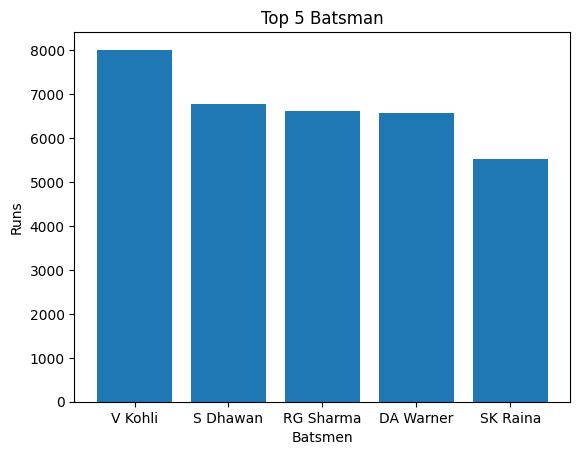

In [17]:
plt.bar(list(top.index),list(top.values))
plt.xlabel("Batsmen")
plt.ylabel("Runs")
plt.title("Top 5 Batsman")



In [23]:
df["dismissal_kind"].unique()


array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [34]:
rules=["run out","lbw","retired hurt","stumped","hit wicket","retired out","obstructing the field"]
topb=df[~df['dismissal_kind'].isin(rules)].groupby("bowler")['is_wicket'].sum().sort_values(ascending=False).head(5)

In [35]:
topb

,is_wicket
bowler,
DJ Bravo,175
YS Chahal,167
B Kumar,167
SL Malinga,159
R Ashwin,152


Text(0.5, 1.0, 'Top 5 Bowlers')

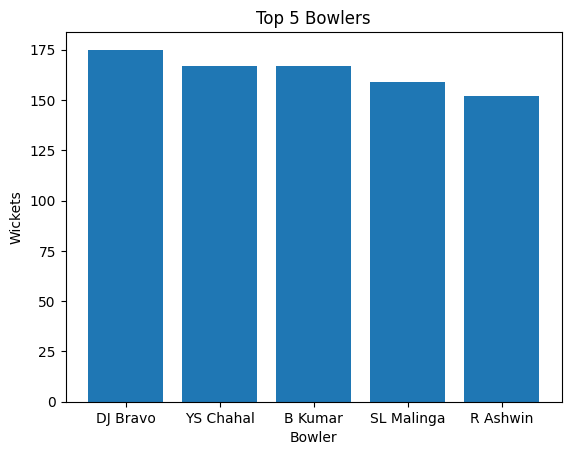

In [36]:
plt.bar(list(topb.index),list(topb.values))
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.title("Top 5 Bowlers")

KeyError: 'Season'

In [41]:
df['date']=pd.to_datetime(df['date'],format="mixed")
df['season']=pd.DatetimeIndex(df['date']).year
print(df['season'])

oc={"Season":None,"OC":None}
l=[]
l1=[]
for season in df['season'].unique():
    ocw=df[df['season']==season].groupby('batter')['batsman_runs'].sum().nlargest(1)
    l.append(season)
    l1.append(ocw.index[0])
oc["Season"]=l
oc["OC"]=l1
oc_df=pd.DataFrame(oc)
oc_df

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
260915    2024
260916    2024
260917    2024
260918    2024
260919    2024
Name: season, Length: 260920, dtype: int32


,Season,OC
0,2008,SE Marsh
1,2009,ML Hayden
2,2010,SR Tendulkar
3,2011,CH Gayle
4,2012,CH Gayle
5,2013,MEK Hussey
6,2014,RV Uthappa
7,2015,DA Warner
8,2016,V Kohli
9,2017,DA Warner


In [43]:
vk=df[df["batter"]=="V Kohli"].groupby("season")["batsman_runs"].sum()

Text(0.5, 1.0, "Virat Kohli's Performance throughout the seasons")

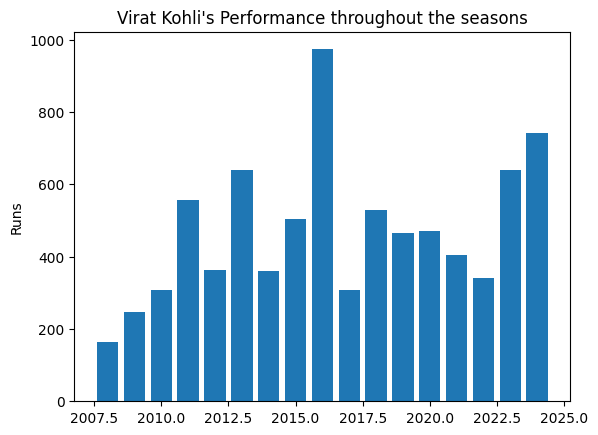

In [48]:
plt.bar(list(vk.index),list(vk.values))
plt.xlabel=("Seasons")
plt.ylabel("Runs")
plt.title("Virat Kohli's Performance throughout the seasons")


In [50]:
vk=df[df['batter']=="V Kohli"]['batsman_runs'].value_counts()